In [1]:
import pandas as pd
import glob
import os
import datetime
import pprint
pp = pprint.PrettyPrinter(indent=4)


In [2]:
sensorFolder = 'spl-deploy-rc3flr'

## Data Pre-Processing

In [ ]:
#checking files in folder -- this notebook is in the same directory

"""
optional

"""
files = os.listdir('./'+sensorFolder)
pp.pprint(files)

In [3]:
#selecting all the csv files
files = os.path.join(sensorFolder,"2022*.csv")

# list of merged files returned
files = glob.glob(files)

#sorting files by date
files.sort()
pp.pprint(files)

#checking a single file
print(files[0])

[   'spl-deploy-rc3flr/2022-05-18.csv',
    'spl-deploy-rc3flr/2022-05-19.csv',
    'spl-deploy-rc3flr/2022-05-20.csv',
    'spl-deploy-rc3flr/2022-05-21.csv',
    'spl-deploy-rc3flr/2022-05-22.csv',
    'spl-deploy-rc3flr/2022-05-23.csv',
    'spl-deploy-rc3flr/2022-05-24.csv',
    'spl-deploy-rc3flr/2022-05-25.csv',
    'spl-deploy-rc3flr/2022-05-26.csv',
    'spl-deploy-rc3flr/2022-05-27.csv',
    'spl-deploy-rc3flr/2022-05-28.csv',
    'spl-deploy-rc3flr/2022-05-29.csv',
    'spl-deploy-rc3flr/2022-05-30.csv',
    'spl-deploy-rc3flr/2022-05-31.csv',
    'spl-deploy-rc3flr/2022-06-01.csv',
    'spl-deploy-rc3flr/2022-06-02.csv',
    'spl-deploy-rc3flr/2022-06-03.csv',
    'spl-deploy-rc3flr/2022-06-04.csv',
    'spl-deploy-rc3flr/2022-06-05.csv',
    'spl-deploy-rc3flr/2022-06-06.csv',
    'spl-deploy-rc3flr/2022-06-07.csv',
    'spl-deploy-rc3flr/2022-06-08.csv',
    'spl-deploy-rc3flr/2022-06-09.csv',
    'spl-deploy-rc3flr/2022-06-10.csv',
    'spl-deploy-rc3flr/2022-06-11.csv',


In [ ]:
#getting total length of rows merged csv SHOULD be
"""
optional

"""
c = 0
for f in files:
    print(f)
    results = pd.read_csv(f)
    c+= len(results)
print(c)

In [4]:
print("Resultant CSV after joining all CSV files at a particular location...");
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
         Unnamed: 0   laeq   lceq   lzeq          time
0                 0  64.35  72.85  73.29  1.652933e+09
1                 1  64.44  73.43  73.85  1.652933e+09
2                 2  64.08  72.59  73.08  1.652933e+09
3                 3  64.06  71.71  72.36  1.652933e+09
4                 4  63.41  71.62  72.22  1.652933e+09
...             ...    ...    ...    ...           ...
1930958         115  61.96  72.26  73.65  1.655093e+09
1930959         116  61.29  73.09  74.81  1.655093e+09
1930960         117  58.99  73.20  74.77  1.655093e+09
1930961         118  58.27  74.80  76.56  1.655093e+09
1930962         119  58.17  73.69  75.72  1.655093e+09

[1930963 rows x 5 columns]


In [5]:
#converting epoch time to datetime
df['time'] = df.time.apply(datetime.datetime.fromtimestamp)
# df['time'] = pd.to_datetime(df['time'], unit = 's')
df.rename(columns={'time': 'datetime'}, inplace=True)


In [6]:
#adding additional columns for datetime 

#extracting exact date
df['date'] = df['datetime'].dt.date

#extracting day of week
df['dayofweek'] = df['datetime'].dt.dayofweek
# df['dayofweek_name'] = df['datetime'].dt.day_name

#extracting extra data
# df['hour'] = df['datetime'].dt.hour
# df['min'] = df['datetime'].dt.minute
# df['sec'] = df['datetime'].dt.second

In [7]:
#checking file
print(df)


         Unnamed: 0   laeq   lceq   lzeq                datetime        date  \
0                 0  64.35  72.85  73.29 2022-05-18 23:59:16.155  2022-05-18   
1                 1  64.44  73.43  73.85 2022-05-18 23:59:16.898  2022-05-18   
2                 2  64.08  72.59  73.08 2022-05-18 23:59:18.392  2022-05-18   
3                 3  64.06  71.71  72.36 2022-05-18 23:59:19.126  2022-05-18   
4                 4  63.41  71.62  72.22 2022-05-18 23:59:19.871  2022-05-18   
...             ...    ...    ...    ...                     ...         ...   
1930958         115  61.96  72.26  73.65 2022-06-13 00:01:54.668  2022-06-13   
1930959         116  61.29  73.09  74.81 2022-06-13 00:01:56.150  2022-06-13   
1930960         117  58.99  73.20  74.77 2022-06-13 00:01:56.893  2022-06-13   
1930961         118  58.27  74.80  76.56 2022-06-13 00:01:57.638  2022-06-13   
1930962         119  58.17  73.69  75.72 2022-06-13 00:01:59.125  2022-06-13   

         dayofweek  
0                2

In [ ]:
#saving df to csv
#df.to_csv('masterdata.csv') uncomment to save file locally

## Analyzing Data

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import figure
import numpy as np

In [289]:
def getBasicStat(groupbyThisName):
    result = df.groupby(groupbyThisName).agg({'laeq': ['mean', 'min', 'max', 'std', 'median']})
    ambientEQ = df.groupby(groupbyThisName).quantile(0.1)
    fiftyEQ = df.groupby(groupbyThisName).quantile(0.5)

    minEQ = df.groupby(groupbyThisName).quantile(0.01)
    maxEQ = df.groupby(groupbyThisName).quantile(0.95)
    
    ambientEQ= ambientEQ['laeq']
    fiftyEQ= fiftyEQ['laeq']

    minsEQ = minEQ['laeq']
    maxsEQ = maxEQ['laeq']

    days = result.index
    means = result['laeq', 'mean']
    
    mins = result['laeq', 'min']
    maxs = result['laeq', 'max']
    stds = result['laeq', 'std']
    medians = result['laeq', 'median']
    
    
#     return result
    return days, means, mins, maxs, stds, medians, ambientEQ, minsEQ, maxsEQ, fiftyEQ;

#### Time-Series: All Data 

In [290]:
DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians, DTambient, DTminsEQ, DTmaxsEQ, DTfiftyEQ = getBasicStat(pd.Grouper(key='datetime', freq='30min'))


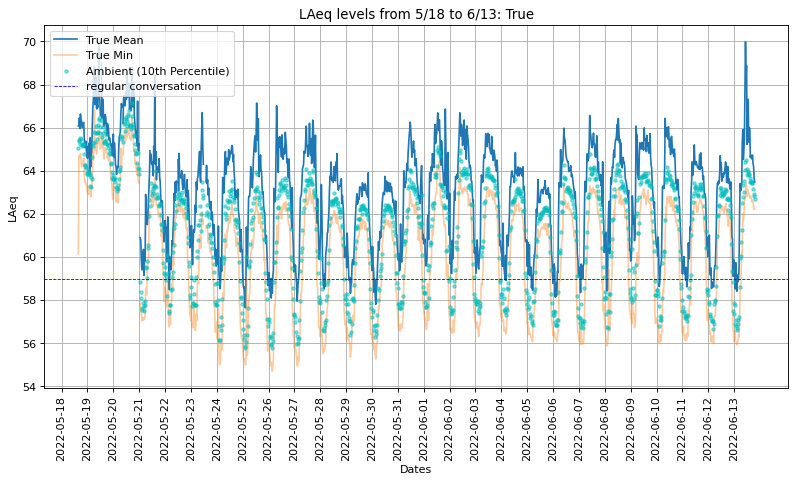

In [433]:
figure(figsize=(12, 6), dpi=80)
plt.plot(DTdays, DTmeans, label='True Mean')

plt.plot(DTdays, DTmins, label='True Min',alpha = 0.4)
plt.plot(DTdays, DTambient,'.', c='c',label = 'Ambient (10th Percentile)', alpha=0.5)
# plt.plot(DTdays, DTmaxs, '.', label = 'True Max', alpha = .4)


# plt.axhline(y=80, linewidth = 0.75,color='r', linestyle='--', label='alarm clock')
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='regular conversation')

plt.xticks(np.unique(DTdays.date))  # Set text labels.
plt.xlabel('Dates')
plt.ylabel('LAeq')
plt.xticks(rotation = 90)
plt.title('LAeq levels from 5/18 to 6/13: True')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

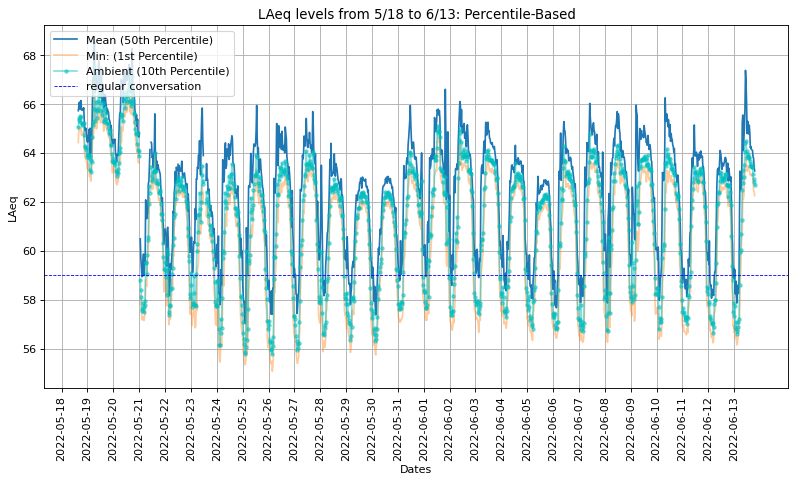

In [422]:
figure(figsize=(12, 6), dpi=80)


plt.plot(DTdays, DTfiftyEQ, label='Mean (50th Percentile)')
plt.plot(DTdays, DTminsEQ, label='Min: (1st Percentile)',alpha = 0.4)
plt.plot(DTdays, DTambient,'.-', c='c',label = 'Ambient (10th Percentile)', alpha=0.5)
# plt.plot(DTdays, DTmaxsEQ,'.',label = 'Max (90th Percentile)', alpha=0.4)
# plt.axhline(y=80, linewidth = 0.75,color='r', linestyle='--', label='alarm clock')
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='regular conversation')

# plt.plot(DTdays, DTmedians)
plt.xticks(np.unique(DTdays.date))  # Set text labels.
plt.xlabel('Dates')
plt.ylabel('LAeq')
plt.xticks(rotation = 90)
plt.title('LAeq levels from 5/18 to 6/13: Percentile-Based')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

#### Time Series: Day of Week

In [39]:
DateDW = df.groupby(pd.Grouper(key='datetime', freq='30min')).agg({'laeq': ['mean', 'min', 'max']})
DateDWambient= df.groupby(pd.Grouper(key='datetime', freq='30min')).quantile(0.1)
DateDW50= df.groupby(pd.Grouper(key='datetime', freq='30min')).quantile(0.5)

DateDW['ambient'] = DateDWambient['laeq']
DateDW['FiftyPercentile'] = DateDW50['laeq']

DateDW['dayofweek'] = DateDW.index.dayofweek
# test = df.groupby(pd.Grouper(key='datetime', freq='1min')).agg({'laeq': ['mean', 'min', 'max']})
print(DateDW)
# print(test.index.dayofweek)

                          laeq               ambient FiftyPercentile dayofweek
                          mean    min    max                                  
datetime                                                                      
2022-05-18 15:30:00  66.081280  60.14  87.18  65.060          65.735         2
2022-05-18 16:00:00  66.085828  64.67  76.03  65.370          65.920         2
2022-05-18 16:30:00  66.445950  64.71  79.45  65.440          66.080         2
2022-05-18 17:00:00  65.962994  64.60  77.46  65.260          65.800         2
2022-05-18 17:30:00  66.636889  64.79  85.48  65.500          66.080         2
...                        ...    ...    ...     ...             ...       ...
2022-06-13 17:00:00  64.728066  62.62  79.67  63.420          64.110         0
2022-06-13 17:30:00  64.330544  62.57  85.57  63.150          63.840         0
2022-06-13 18:00:00  64.221661  62.28  84.56  62.940          63.800         0
2022-06-13 18:30:00  63.666956  62.20  74.28  62.810

In [40]:
print(DateDW.iloc[2]) 
      #== datetime.time(15, 30))
print(DateDW.index.time)


laeq             mean    66.44595
                 min     64.71000
                 max     79.45000
ambient                  65.44000
FiftyPercentile          66.08000
dayofweek                 2.00000
Name: 2022-05-18 16:30:00, dtype: float64
[datetime.time(15, 30) datetime.time(16, 0) datetime.time(16, 30) ...
 datetime.time(18, 0) datetime.time(18, 30) datetime.time(19, 0)]


In [41]:
# print(DateDW.items)
testing1 = DateDW.index
print(testing1[0])
testing1[0].time() == datetime.time(15, 30)
# for time in DateDW.index.date 



2022-05-18 15:30:00


True

In [168]:
def groupWeek(data, showData = False):
    weeks = {}
    wk = pd.DataFrame(columns = data.columns)
    dates = data.index
    c = 0
#     print(type(wk), type(data))

    for d in dates:
        if (d.dayofweek == 6 and d.time() == dates.time.max()):
            c+=1
#             wk.loc[data.index[c]]=data.loc[data.index[c]]
            wk.loc[d]=data.loc[d]
#             print(f'week is {wk}')
            weeks[c] = wk
#             weeks.append(wk)
#             print(f'-----------WEEKS IS NOW {weeks}')
#             print(c)
#             print(weeks['c'])
            wk = pd.DataFrame(columns = data.columns)
#             print(wk)
        else:
#             wk.append(data.loc[d])
#             print(type(wk), wk)
            wk.loc[d]=data.loc[d]
#         print(d.dayofweek)
    if showData == True:
        for key in weeks:
            print("\n" +"="*40)
            print(key)
            print("-"*40)
            print(weeks[key])
    return weeks;

# for d in DateDW.index:
#     print(type(d))
# print(type(DateDW.index[0]))
# print()

In [169]:
groupWeek(DateDW)

{1:                           laeq               ambient FiftyPercentile dayofweek
                           mean    min    max                                  
 2022-05-18 15:30:00  66.081280  60.14  87.18  65.060          65.735       2.0
 2022-05-18 16:00:00  66.085828  64.67  76.03  65.370          65.920       2.0
 2022-05-18 16:30:00  66.445950  64.71  79.45  65.440          66.080       2.0
 2022-05-18 17:00:00  65.962994  64.60  77.46  65.260          65.800       2.0
 2022-05-18 17:30:00  66.636889  64.79  85.48  65.500          66.080       2.0
 ...                        ...    ...    ...     ...             ...       ...
 2022-05-22 21:30:00  63.090202  59.66  77.86  60.930          62.330       6.0
 2022-05-22 22:00:00  62.485377  58.73  81.16  59.775          61.870       6.0
 2022-05-22 22:30:00  61.710389  58.08  78.64  59.597          61.210       6.0
 2022-05-22 23:00:00  60.431300  57.37  76.72  58.248          59.935       6.0
 2022-05-22 23:30:00  60.597643  57.2

In [170]:
daysofweekDict = {0:'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                  4: 'Friday', 5: 'Saturday', 6: 'Sunday'}


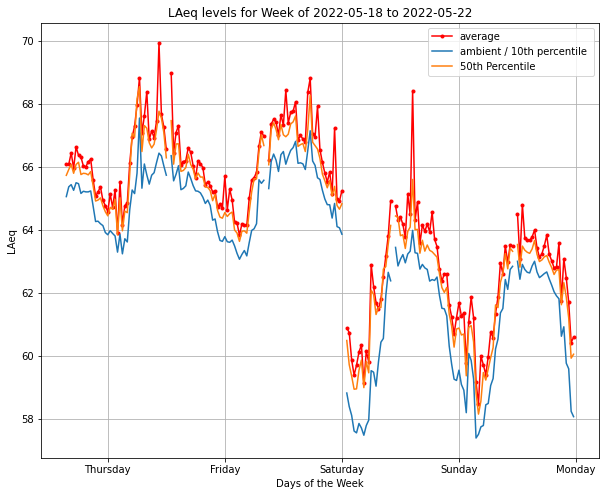

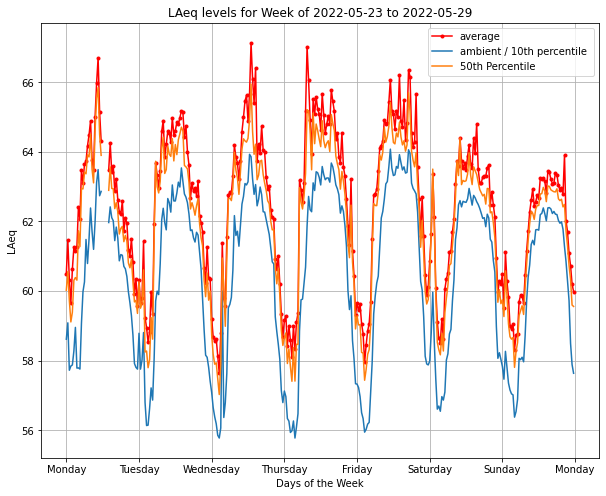

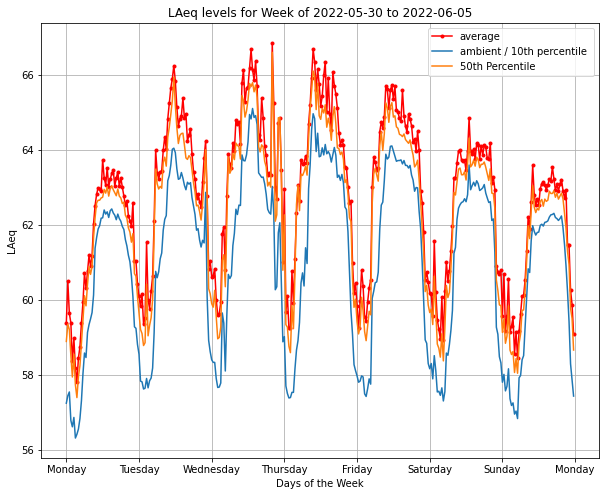

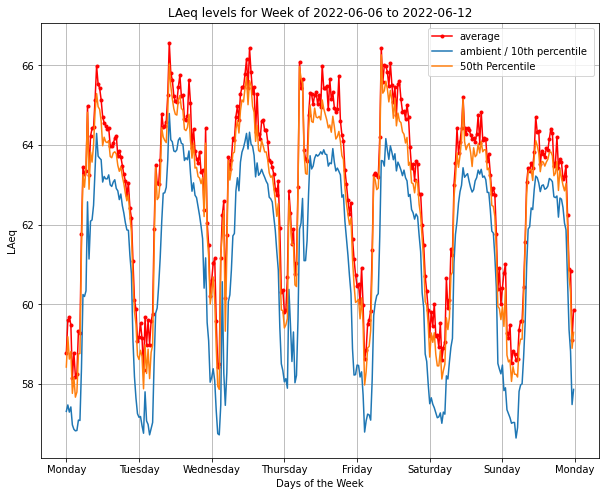

In [425]:
weekInfo = groupWeek(DateDW)

for week in weekInfo:
#     print(week)
    DWlabels = weekInfo[week].index
    DWlabels_DW = [daysofweekDict.get(i) for i in np.unique(weekInfo[week].index.dayofweek)]
    DWambient = weekInfo[week].ambient
    DW50 = weekInfo[week].FiftyPercentile

    DWmeans = weekInfo[week].laeq['mean']

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(DWlabels, DWmeans,'.-', c = 'r')
#     plt.plot(DWlabels, DWmins, '.-', c = 'm')
#     plt.plot(DWlabels, DWmaxs, '.-', c = 'b')
    ax.plot(DWlabels, DWambient)
    ax.plot(DWlabels, DW50)
    
    ax.set_xlabel('Days of the Week')
    ax.set_ylabel('LAeq')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%A')) 

    # plt.yticks(np.linspace(round(min(mins)-1), np.ceil(max(maxs)),10, dtype=int))
    # plt.xticks(rotation = 90)
    plt.title(f'LAeq levels for Week of {DWlabels[0].date()} to {DWlabels[-1].date()}')
    plt.legend(['average','ambient / 10th percentile ', '50th Percentile'])
    ax.grid(True)
    plt.show()


## -------------------------

#### Heat Map: Average Hourly LAeq Levels per Day of Week

In [172]:
import seaborn as sns

In [173]:
HMxHR = df.groupby(pd.Grouper(key='datetime', freq='1H')).agg({'laeq': ['mean', 'min', 'max']})
HMxHRambient= df.groupby(pd.Grouper(key='datetime', freq='1H')).quantile(0.1)
HMxHR50= df.groupby(pd.Grouper(key='datetime', freq='1H')).quantile(0.5)

HMxHR['ambient'] = HMxHRambient['laeq']
HMxHR['FiftyPercentile'] = HMxHR50['laeq']

HMxHR['dayofweek'] = HMxHR.index.dayofweek
HMxHR['hour'] = HMxHR.index.hour

# test = df.groupby(pd.Grouper(key='datetime', freq='1min')).agg({'laeq': ['mean', 'min', 'max']})
print(HMxHR)
# print(test.index.dayofweek)

# laeq_mean = df.groupby(['hour', 'dayofweek']).agg({'laeq': ['mean']})

                          laeq               ambient FiftyPercentile  \
                          mean    min    max                           
datetime                                                               
2022-05-18 15:00:00  66.081280  60.14  87.18  65.060          65.735   
2022-05-18 16:00:00  66.265889  64.67  79.45  65.400          65.990   
2022-05-18 17:00:00  66.299942  64.60  85.48  65.370          65.920   
2022-05-18 18:00:00  66.343444  64.19  83.52  65.270          65.970   
2022-05-18 19:00:00  66.017406  64.22  86.57  65.220          65.790   
...                        ...    ...    ...     ...             ...   
2022-06-13 15:00:00  64.679119  62.78  80.00  63.500          64.250   
2022-06-13 16:00:00  64.568303  62.55  82.80  63.450          64.135   
2022-06-13 17:00:00  64.529194  62.57  85.57  63.270          63.990   
2022-06-13 18:00:00  63.944308  62.20  84.56  62.870          63.590   
2022-06-13 19:00:00  63.471345  62.25  67.81  62.698          63

In [174]:
HMxHRxWK = groupWeek(HMxHR)
print(HMxHRxWK)

{1:                           laeq               ambient FiftyPercentile  \
                          mean    min    max                           
2022-05-18 15:00:00  66.081280  60.14  87.18  65.060          65.735   
2022-05-18 16:00:00  66.265889  64.67  79.45  65.400          65.990   
2022-05-18 17:00:00  66.299942  64.60  85.48  65.370          65.920   
2022-05-18 18:00:00  66.343444  64.19  83.52  65.270          65.970   
2022-05-18 19:00:00  66.017406  64.22  86.57  65.220          65.790   
...                        ...    ...    ...     ...             ...   
2022-05-22 19:00:00  62.920560  61.42  76.55  62.150          62.710   
2022-05-22 20:00:00  63.274075  61.26  79.28  61.860          62.740   
2022-05-22 21:00:00  62.615965  59.66  77.86  60.805          61.975   
2022-05-22 22:00:00  62.172133  58.08  81.16  59.700          61.490   
2022-05-22 23:00:00  60.499794  57.21  76.72  58.198          60.000   

                    dayofweek  hour  
                     

In [237]:
def plotHeatMap(datadict, column, index, values, labelDoW=False):
    for wk in datadict:
        wkData = datadict[wk]
        dateLabels = np.unique(wkData.index.date)

    #     df3 = wkData.reset_index().pivot(columns = 'dayofweek',index = 'index', values='ambient')

        df3 = wkData.reset_index().pivot(columns=column,index = index,values=values)
    #     print(np.unique(wkData.index.date))
        fig, ax = plt.subplots(figsize=(5, 7))
        hm = sns.heatmap(df3, vmin = 55, vmax = 70, linewidths=.5,cmap='OrRd');
    #     hm.invert_yaxis()
        hm.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
        hm.xaxis.set_major_formatter(mdates.DateFormatter('%A')) 
        if labelDoW == True:
            hm.set_yticks(np.arange(len(timeofdayDict.values())))
            hm.set_yticklabels(timeofdayDict.values(), rotation=0)
        plt.setp(hm.get_xticklabels(), rotation=45, horizontalalignment='right')

    # hm.set_xticks(np.arange(len(DWlabels)))
    # hm.set_xticklabels(DWlabels, rotation=45)

        plt.xlabel('Day of Week')
        plt.ylabel('Hour')
        plt.title(f'Heat Map of LAeq 50th Percentile Levels Week of {dateLabels[0]} to {dateLabels[-1]}')

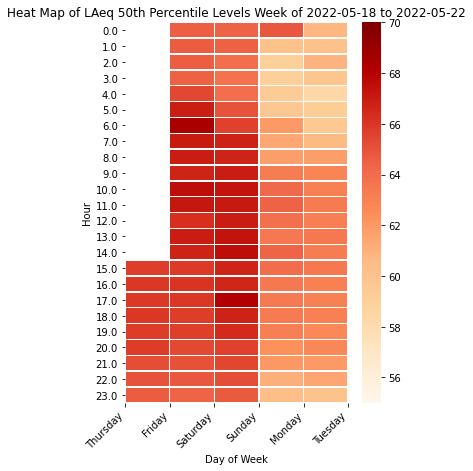

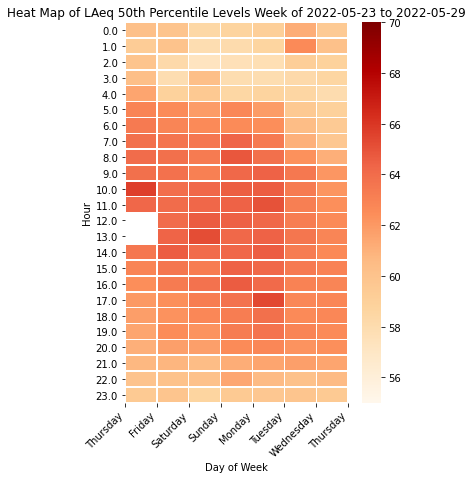

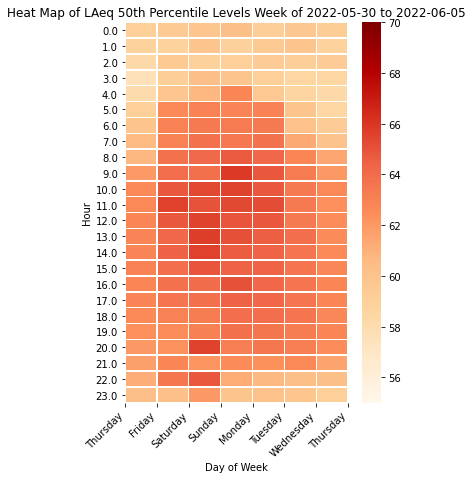

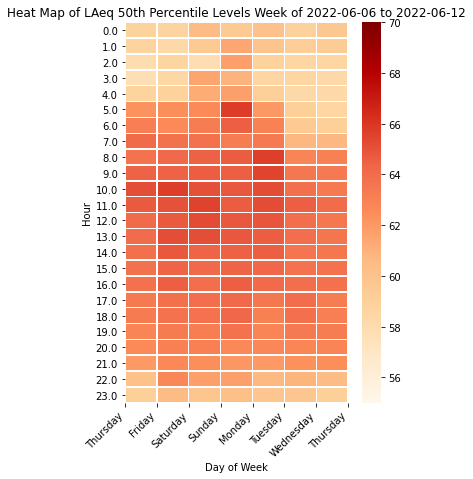

In [238]:
plotHeatMap(HMxHRxWK, 'dayofweek', 'hour', 'FiftyPercentile')

#### Heat Map: LAeq Levels by Time of Day per Day of Week

In [194]:
HMxTD = df.groupby(pd.Grouper(key='datetime', freq='6H')).agg({'laeq': ['mean', 'min', 'max']})
HMxTDambient= df.groupby(pd.Grouper(key='datetime', freq='6H')).quantile(0.1)
HMxTD50= df.groupby(pd.Grouper(key='datetime', freq='6H')).quantile(0.5)

HMxTD['ambient'] = HMxTDambient['laeq']
HMxTD['FiftyPercentile'] = HMxTD50['laeq']
HMxTD['dayofweek'] = HMxTD.index.dayofweek
HMxTD['hour'] = HMxTD.index.hour


timeofdayDict = {0: 'Early Morning (12am-6am)', 
                 6: 'Morning (6am-12pm)', 
                 12: 'Afternoon (12pm-6pm)', 
                 18: 'Night (6pm-12am)'}

# HMxHR['timeofday'] = [timeofdayDict.get(i) for i in HMxTD.index.hour]



In [380]:
HMxTD['timeofday'] = [timeofdayDict.get(i) for i in HMxTD.index.hour]
print(HMxTD)


                          laeq               ambient FiftyPercentile  \
                          mean    min    max                           
datetime                                                               
2022-05-18 12:00:00  66.245063  60.14  87.18  65.310          65.920   
2022-05-18 18:00:00  65.675443  63.28  88.32  64.440          65.480   
2022-05-19 00:00:00  65.065275  62.79  87.52  63.870          64.680   
2022-05-19 06:00:00  67.848275  64.77  85.75  65.870          67.210   
2022-05-19 12:00:00  66.829829  64.55  86.13  65.550          66.265   
...                        ...    ...    ...     ...             ...   
2022-06-12 18:00:00  62.304280  56.57  86.66  59.069          62.650   
2022-06-13 00:00:00  59.696810  55.93  82.86  57.050          58.920   
2022-06-13 06:00:00  65.914120  58.52  99.95  62.090          64.970   
2022-06-13 12:00:00  65.310339  62.55  85.57  63.540          64.510   
2022-06-13 18:00:00  63.929175  62.20  84.56  62.860          63

In [196]:
HMxTDxWK = groupWeek(HMxTD)
print(HMxTDxWK)

{1:                           laeq               ambient FiftyPercentile  \
                          mean    min    max                           
2022-05-18 12:00:00  66.245063  60.14  87.18  65.310          65.920   
2022-05-18 18:00:00  65.675443  63.28  88.32  64.440          65.480   
2022-05-19 00:00:00  65.065275  62.79  87.52  63.870          64.680   
2022-05-19 06:00:00  67.848275  64.77  85.75  65.870          67.210   
2022-05-19 12:00:00  66.829829  64.55  86.13  65.550          66.265   
2022-05-19 18:00:00  65.428847  62.67  79.78  64.160          65.290   
2022-05-20 00:00:00  64.750783  62.51  74.63  63.410          64.270   
2022-05-20 06:00:00  66.893640  63.30  87.57  65.160          66.830   
2022-05-20 12:00:00  67.622053  65.42  83.44  66.250          67.110   
2022-05-20 18:00:00  66.064405  63.41  84.89  64.520          65.715   
2022-05-21 00:00:00  60.266738  57.05  76.89  57.900          59.630   
2022-05-21 06:00:00  62.967305  58.24  78.03  60.182        

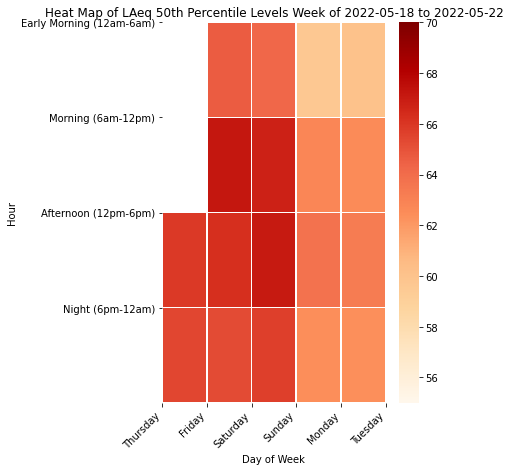

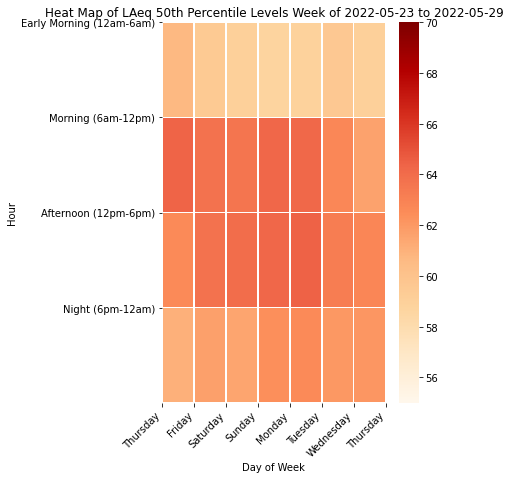

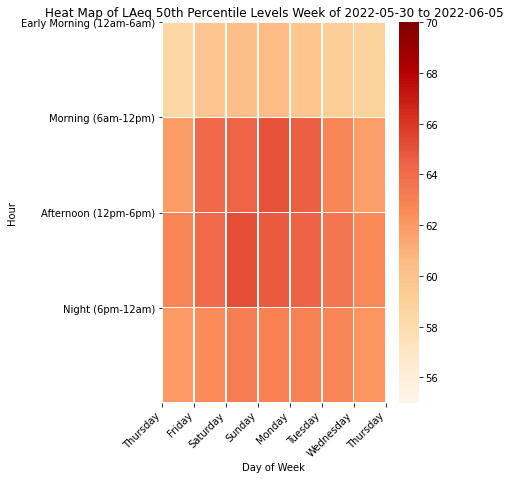

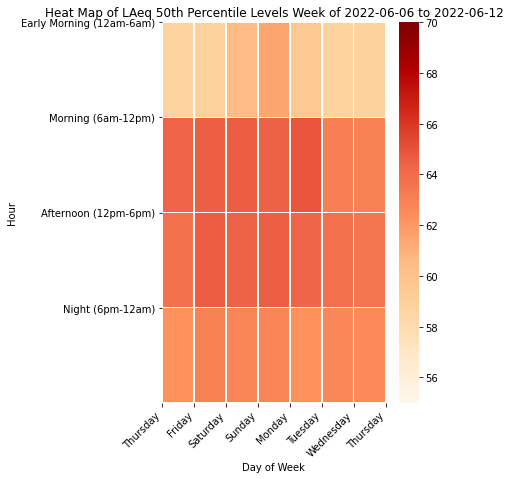

In [234]:
plotHeatMap(HMxTDxWK, 'dayofweek','hour', 'FiftyPercentile',labelDoW = True)

==========================================================

/Users/anniechu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Text(0.5, 1.0, 'Heat Map of LAeq 50th Percentile Levels Week of 2022-05-18 to 2022-06-13')

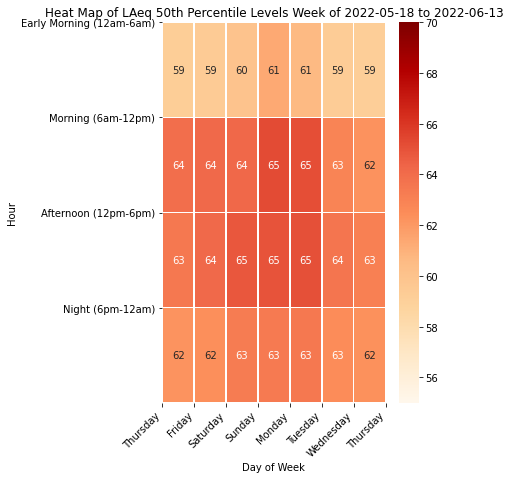

In [434]:
# print(HMxTD)
# y = x.reset_index().pivot_table(index='hour', columns='dayofweek', values='laeq', aggfunc='mean')
df69 = HMxTD.reset_index().pivot_table(columns = 'dayofweek',index = 'hour', values='FiftyPercentile')
# print(df69)
fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(df69, annot = True,vmin = 55, vmax = 70, linewidths=.5,cmap='OrRd');
#     hm.invert_yaxis()
hm.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
hm.xaxis.set_major_formatter(mdates.DateFormatter('%A')) 
hm.set_yticks(np.arange(len(timeofdayDict.values())))
hm.set_yticklabels(timeofdayDict.values(), rotation=0)
plt.setp(hm.get_xticklabels(), rotation=45, horizontalalignment='right')

# hm.set_xticks(np.arange(len(timeofdayDict.values())))
# hm.set_xticklabels(timeofdayDict.values(, rotation=45)

plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.title(f'Heat Map of LAeq 50th Percentile Levels Week of {dateLabels[0]} to {dateLabels[-1]}')

#### Box Plots?

In [440]:
BPxMIN = df.groupby(pd.Grouper(key='datetime', freq='1min')).agg({'laeq': ['mean', 'min', 'max']})
BPxMINambient= df.groupby(pd.Grouper(key='datetime', freq='1min')).quantile(0.1)
BPxMIN50= df.groupby(pd.Grouper(key='datetime', freq='1min')).quantile(0.5)

BPxMIN['ambient'] = BPxMINambient['laeq']
BPxMIN['FiftyPercentile'] = BPxMIN50['laeq']

BPxMIN['dayofweek'] = BPxMIN.index.dayofweek
BPxMIN['date'] = BPxMIN.index.date

print(BPxMIN)

# test = df.groupby(pd.Grouper(key='datetime', freq='1min')).agg({'laeq': ['mean', 'min', 'max']})
# print(DateDW)

                          laeq               ambient FiftyPercentile  \
                          mean    min    max                           
datetime                                                               
2022-05-18 15:32:00  66.099091  60.14  87.18  60.509          65.355   
2022-05-18 15:33:00  65.966333  64.98  72.27  65.198          65.730   
2022-05-18 15:34:00  66.005500  64.88  76.29  65.099          65.650   
2022-05-18 15:35:00  65.437667  64.44  66.50  64.989          65.360   
2022-05-18 15:36:00  65.522500  64.67  66.89  64.923          65.475   
...                        ...    ...    ...     ...             ...   
2022-06-13 18:57:00  63.218833  62.30  66.92  62.499          63.110   
2022-06-13 18:58:00  63.468136  62.35  69.81  62.590          63.250   
2022-06-13 18:59:00  62.991803  62.26  64.81  62.430          62.920   
2022-06-13 19:00:00  63.196833  62.25  65.06  62.648          63.085   
2022-06-13 19:01:00  63.750508  62.25  67.81  62.738          63

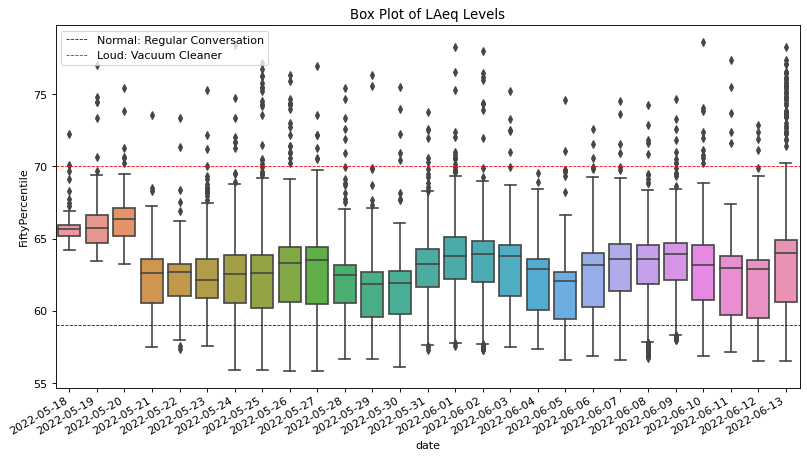

In [444]:
# boxplot = DateDW.boxplot(by='dayofweek', column = ['ambient'])
figure(figsize=(12, 6), dpi=80)

ax = sns.boxplot(x=BPxMIN['date'], y=BPxMIN['FiftyPercentile'], showfliers=True)
# ax = sns.boxplot(x=BPxMIN['date'], y=BPxMIN.laeq['mean'], showfliers=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right');
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='Normal: Regular Conversation')
plt.axhline(y=70, linewidth = 0.75,color='r', linestyle='--', label='Loud: Vacuum Cleaner')

plt.legend()
plt.title('Box Plot of LAeq Levels');

### Splitting into Day/Night

In [446]:

# print(dfREUP)
dfREUP = BPxMIN
day = dfREUP.between_time('06:00','18:00', include_start=True, include_end=False)
night = dfREUP.between_time('18:00','06:00',include_start=True, include_end=False)

print(day)
print(night)
# print(len(dfREUP), len(day)+len(night))



                          laeq               ambient FiftyPercentile  \
                          mean    min    max                           
datetime                                                               
2022-05-18 15:32:00  66.099091  60.14  87.18  60.509          65.355   
2022-05-18 15:33:00  65.966333  64.98  72.27  65.198          65.730   
2022-05-18 15:34:00  66.005500  64.88  76.29  65.099          65.650   
2022-05-18 15:35:00  65.437667  64.44  66.50  64.989          65.360   
2022-05-18 15:36:00  65.522500  64.67  66.89  64.923          65.475   
...                        ...    ...    ...     ...             ...   
2022-06-13 17:55:00  63.953607  62.57  67.95  62.840          63.690   
2022-06-13 17:56:00  63.487000  62.58  67.57  62.919          63.365   
2022-06-13 17:57:00  64.298333  63.16  67.35  63.516          64.040   
2022-06-13 17:58:00  64.202373  63.13  67.22  63.480          64.000   
2022-06-13 17:59:00  63.987377  62.89  68.62  63.050          63

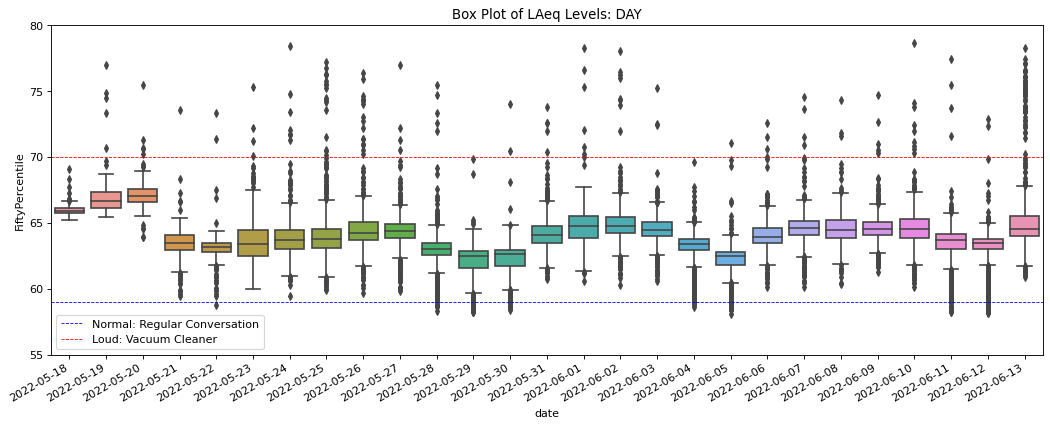

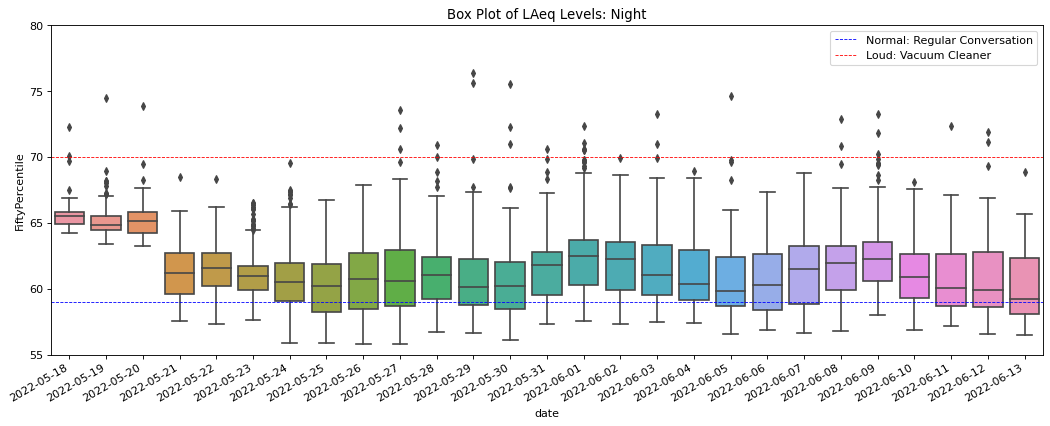

In [457]:
figure(figsize=(16, 12), dpi=80)
plt.subplot(211)
axDay = sns.boxplot(x=day['date'], y=day['FiftyPercentile'], showfliers=True)
# ax = sns.boxplot(x=BPxMIN['date'], y=BPxMIN.laeq['mean'], showfliers=True)
axDay.set_xticklabels(axDay.get_xticklabels(),rotation=30, horizontalalignment='right');
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='Normal: Regular Conversation')
plt.axhline(y=70, linewidth = 0.75,color='r', linestyle='--', label='Loud: Vacuum Cleaner')
plt.ylim(55, 80)

plt.legend()
plt.title('Box Plot of LAeq Levels: DAY');


figure(figsize=(16, 12), dpi=80)
plt.subplot(212)
axNight = sns.boxplot(x=night['date'], y=night['FiftyPercentile'], showfliers=True)
# ax = sns.boxplot(x=BPxMIN['date'], y=BPxMIN.laeq['mean'], showfliers=True)
axNight.set_xticklabels(axNight.get_xticklabels(),rotation=30, horizontalalignment='right');
plt.axhline(y=59, linewidth = 0.75,color='b', linestyle='--', label='Normal: Regular Conversation')
plt.axhline(y=70, linewidth = 0.75,color='r', linestyle='--', label='Loud: Vacuum Cleaner')
plt.ylim(55, 80)

plt.legend()
plt.title('Box Plot of LAeq Levels: Night');